In [171]:
# Data visualization
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd 
import seaborn as sns
# Keras
from keras.models import Sequential
from keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, Adadelta, RMSprop
import keras.backend as K
# Train-Test
from sklearn.model_selection import train_test_split
# Scaling data
from sklearn.preprocessing import StandardScaler
# Classification Report
from sklearn.metrics import classification_report
from keras.layers import Dense,Dropout,Flatten
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from keras.utils.np_utils import to_categorical

dftrain = pd.read_csv('coords_500_Resize.csv')
dftest = pd.read_csv('coords_500_test_Resize.csv')

dftrain_s = dftrain.sample(frac=1, random_state=1234)
dftest_s = dftest.sample(frac=1, random_state=1234)

# normal
X_train = dftrain_s.drop(['name','class'], axis=1) # features
y_train = dftrain_s['class'] # target value
X_test = dftest_s.drop(['name','class'], axis=1) # features
y_test = dftest_s['class']

In [55]:
from sklearn.preprocessing import LabelEncoder
import numpy as np

label_encoder = LabelEncoder()
vec = label_encoder.fit_transform(y_train)

array([3, 0, 2, ..., 3, 1, 7])

In [94]:
Y = to_categorical(vec, num_classes=8)

In [95]:
yec = label_encoder.fit_transform(y_test)
Ytest = to_categorical(yec, num_classes=8)

In [182]:
model = Sequential()
model.add(Dense(2048, input_dim = X_train.shape[1], activation = 'relu')) # input layer requires input_dim param
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(1024, activation = 'relu'))
model.add(Dense(512, activation = 'relu'))
model.add(Dense(128, activation = 'relu'))
model.add(Dense(8, activation='softmax'))
model.compile(loss="categorical_crossentropy", optimizer= "adam", metrics=['accuracy'])

history = model.fit(X_train, Y, validation_split=0.33, epochs = 100, batch_size=32, verbose=1)

Epoch 1/100
134/134 [==============================] - 2s 9ms/step - loss: 2.0556 - accuracy: 0.1593 - val_loss: 1.9559 - val_accuracy: 0.2252
Epoch 2/100
134/134 [==============================] - 1s 7ms/step - loss: 1.8271 - accuracy: 0.2668 - val_loss: 1.6652 - val_accuracy: 0.3395
Epoch 3/100
134/134 [==============================] - 1s 7ms/step - loss: 1.7339 - accuracy: 0.3158 - val_loss: 1.6930 - val_accuracy: 0.3514
Epoch 4/100
134/134 [==============================] - 1s 7ms/step - loss: 1.6302 - accuracy: 0.3656 - val_loss: 1.6340 - val_accuracy: 0.3523
Epoch 5/100
134/134 [==============================] - 1s 8ms/step - loss: 1.5895 - accuracy: 0.3782 - val_loss: 1.4998 - val_accuracy: 0.4135
Epoch 6/100
134/134 [==============================] - 1s 8ms/step - loss: 1.5393 - accuracy: 0.4041 - val_loss: 1.6254 - val_accuracy: 0.3736
Epoch 7/100
134/134 [==============================] - 1s 7ms/step - loss: 1.4843 - accuracy: 0.4188 - val_loss: 1.5180 - val_accuracy: 0.4021

In [183]:
model.summary()

Model: "sequential_44"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_184 (Dense)           (None, 2048)              3835904   
                                                                 
 dense_185 (Dense)           (None, 1024)              2098176   
                                                                 
 dense_186 (Dense)           (None, 1024)              1049600   
                                                                 
 dense_187 (Dense)           (None, 512)               524800    
                                                                 
 dense_188 (Dense)           (None, 128)               65664     
                                                                 
 dense_189 (Dense)           (None, 8)                 1032      
                                                                 
Total params: 7,575,176
Trainable params: 7,575,176
N

In [184]:
y_pred_class = model.predict(X_test)
pred_x = np.argmax(y_pred_class, axis=1)
y_test_class = np.argmax(Ytest, axis=1)

In [85]:
pred_x

array([5, 4, 7, 1, 7, 4, 5, 5, 6, 3, 3, 0, 2, 5, 0, 1, 3, 2, 5, 0, 4, 5,
       4, 4, 7, 1, 4, 7, 5, 4, 5, 1, 5, 1, 2, 1, 4, 4, 5, 5, 0, 3, 5, 4,
       0, 5, 2, 4, 1, 7, 5, 1, 5, 1, 5, 5, 6, 1, 1, 4, 5, 4, 1, 1, 1, 5,
       7, 4, 2, 5, 4, 5, 1, 1, 0, 5, 3, 7, 4, 3, 1, 0, 5, 5, 5, 4, 1, 6,
       0, 6, 0, 4, 5, 5, 1, 1, 5, 2, 3, 4, 5, 4, 7, 7, 6, 1, 5, 5, 5, 3,
       2, 7, 0, 4, 4, 6, 6, 1, 7, 5, 6, 7, 7, 1, 1, 5, 1, 7, 5, 1, 4, 4,
       1, 5, 5, 2, 1, 5, 1, 5, 0, 1, 1, 7, 1, 5, 1, 6, 1, 1, 1, 4, 6, 3,
       2, 7, 6, 5, 5, 4, 7, 3, 5, 5, 5, 7, 1, 6, 5, 6, 1, 3, 3, 5, 1, 4,
       7, 4, 5, 5, 0, 6, 1, 0, 1, 5, 3, 2, 1, 1, 5, 4, 1, 7, 2, 3, 7, 3,
       5, 5, 1, 1, 5, 1, 1, 3, 5, 4, 5, 5, 3, 5, 2, 0, 7, 7, 7, 4, 4, 3,
       5, 1, 6, 7, 3, 0, 4, 0, 4, 5, 5, 0, 5, 5, 5, 1, 2, 5, 1, 4, 1, 1,
       1, 5, 3, 5, 1, 4, 7, 1, 7, 1, 1, 7, 7, 5, 2, 1, 3, 5, 3, 4, 0, 5,
       5, 7, 0, 0, 5, 0, 0, 5, 5, 6, 5, 1, 3, 3, 1, 2, 7, 1, 4, 4, 7, 1,
       7, 4, 3, 1, 5, 1, 1, 5, 4, 0, 5, 7, 1, 0, 7,

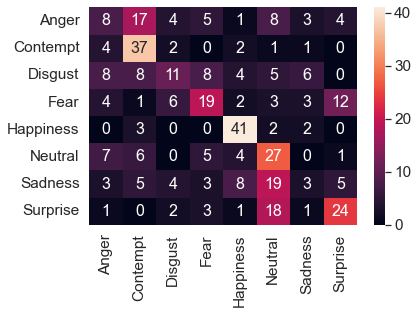

In [185]:
from sklearn.metrics import confusion_matrix
classlist = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']
P_classlist = ['Anger', 'Contempt', 'Disgust', 'Fear', 'Happiness', 'Neutral', 'Sadness', 'Surprise']
cm = confusion_matrix(y_test_class, pred_x)

df_cm = pd.DataFrame(cm, classlist, P_classlist) #(cm, range(8), range(8))
sns.set(font_scale=1.4) # for label size
sns.heatmap(df_cm, annot=True, annot_kws={"size": 16}) # font size

plt.show()

In [186]:
from sklearn.metrics import classification_report
print(classification_report(y_test_class, pred_x))

              precision    recall  f1-score   support

           0       0.23      0.16      0.19        50
           1       0.48      0.79      0.60        47
           2       0.38      0.22      0.28        50
           3       0.44      0.38      0.41        50
           4       0.65      0.85      0.74        48
           5       0.33      0.54      0.41        50
           6       0.16      0.06      0.09        50
           7       0.52      0.48      0.50        50

    accuracy                           0.43       395
   macro avg       0.40      0.44      0.40       395
weighted avg       0.40      0.43      0.40       395

